***Detecting Parkinson's Disease using XGBoost Library in Python***

# 1. Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings


# 2. Loading the dataset

In [4]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data=pd.read_csv(url)
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0  phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1  phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2  phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3  phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4  phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335

[5 rows x 24 columns]

# 3. EDA and Data Analysis

In [5]:
data.shape

(195, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0  phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1  phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2  phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3  phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4  phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335

[5 rows x 24 columns]

In [8]:
data.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

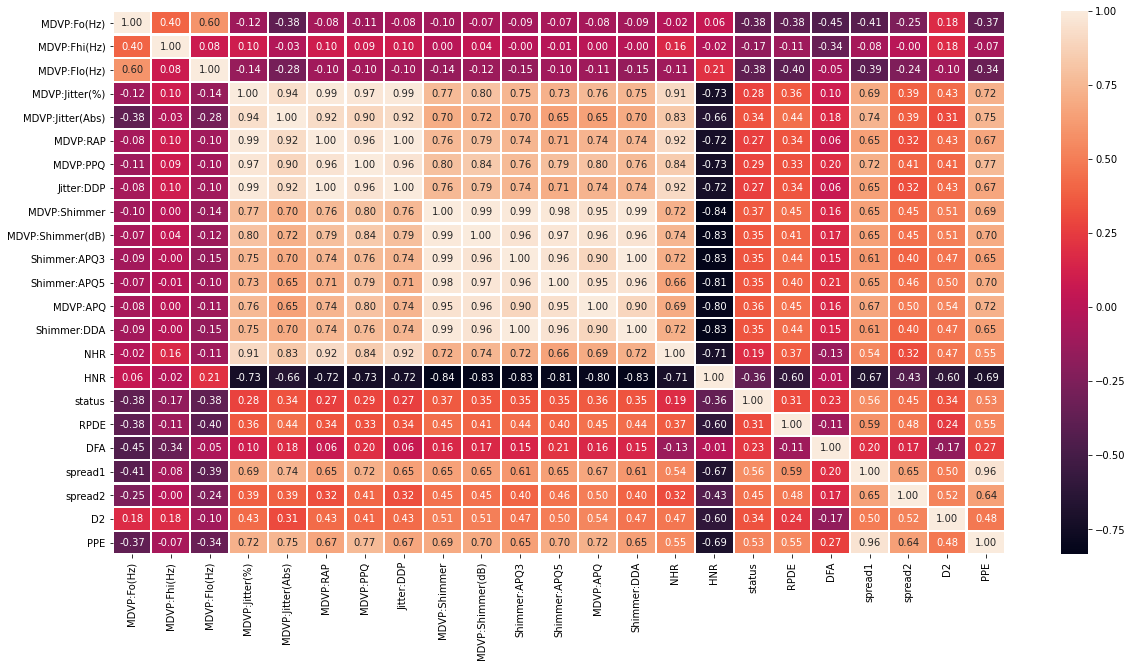

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",linewidths="1.2")
plt.show()

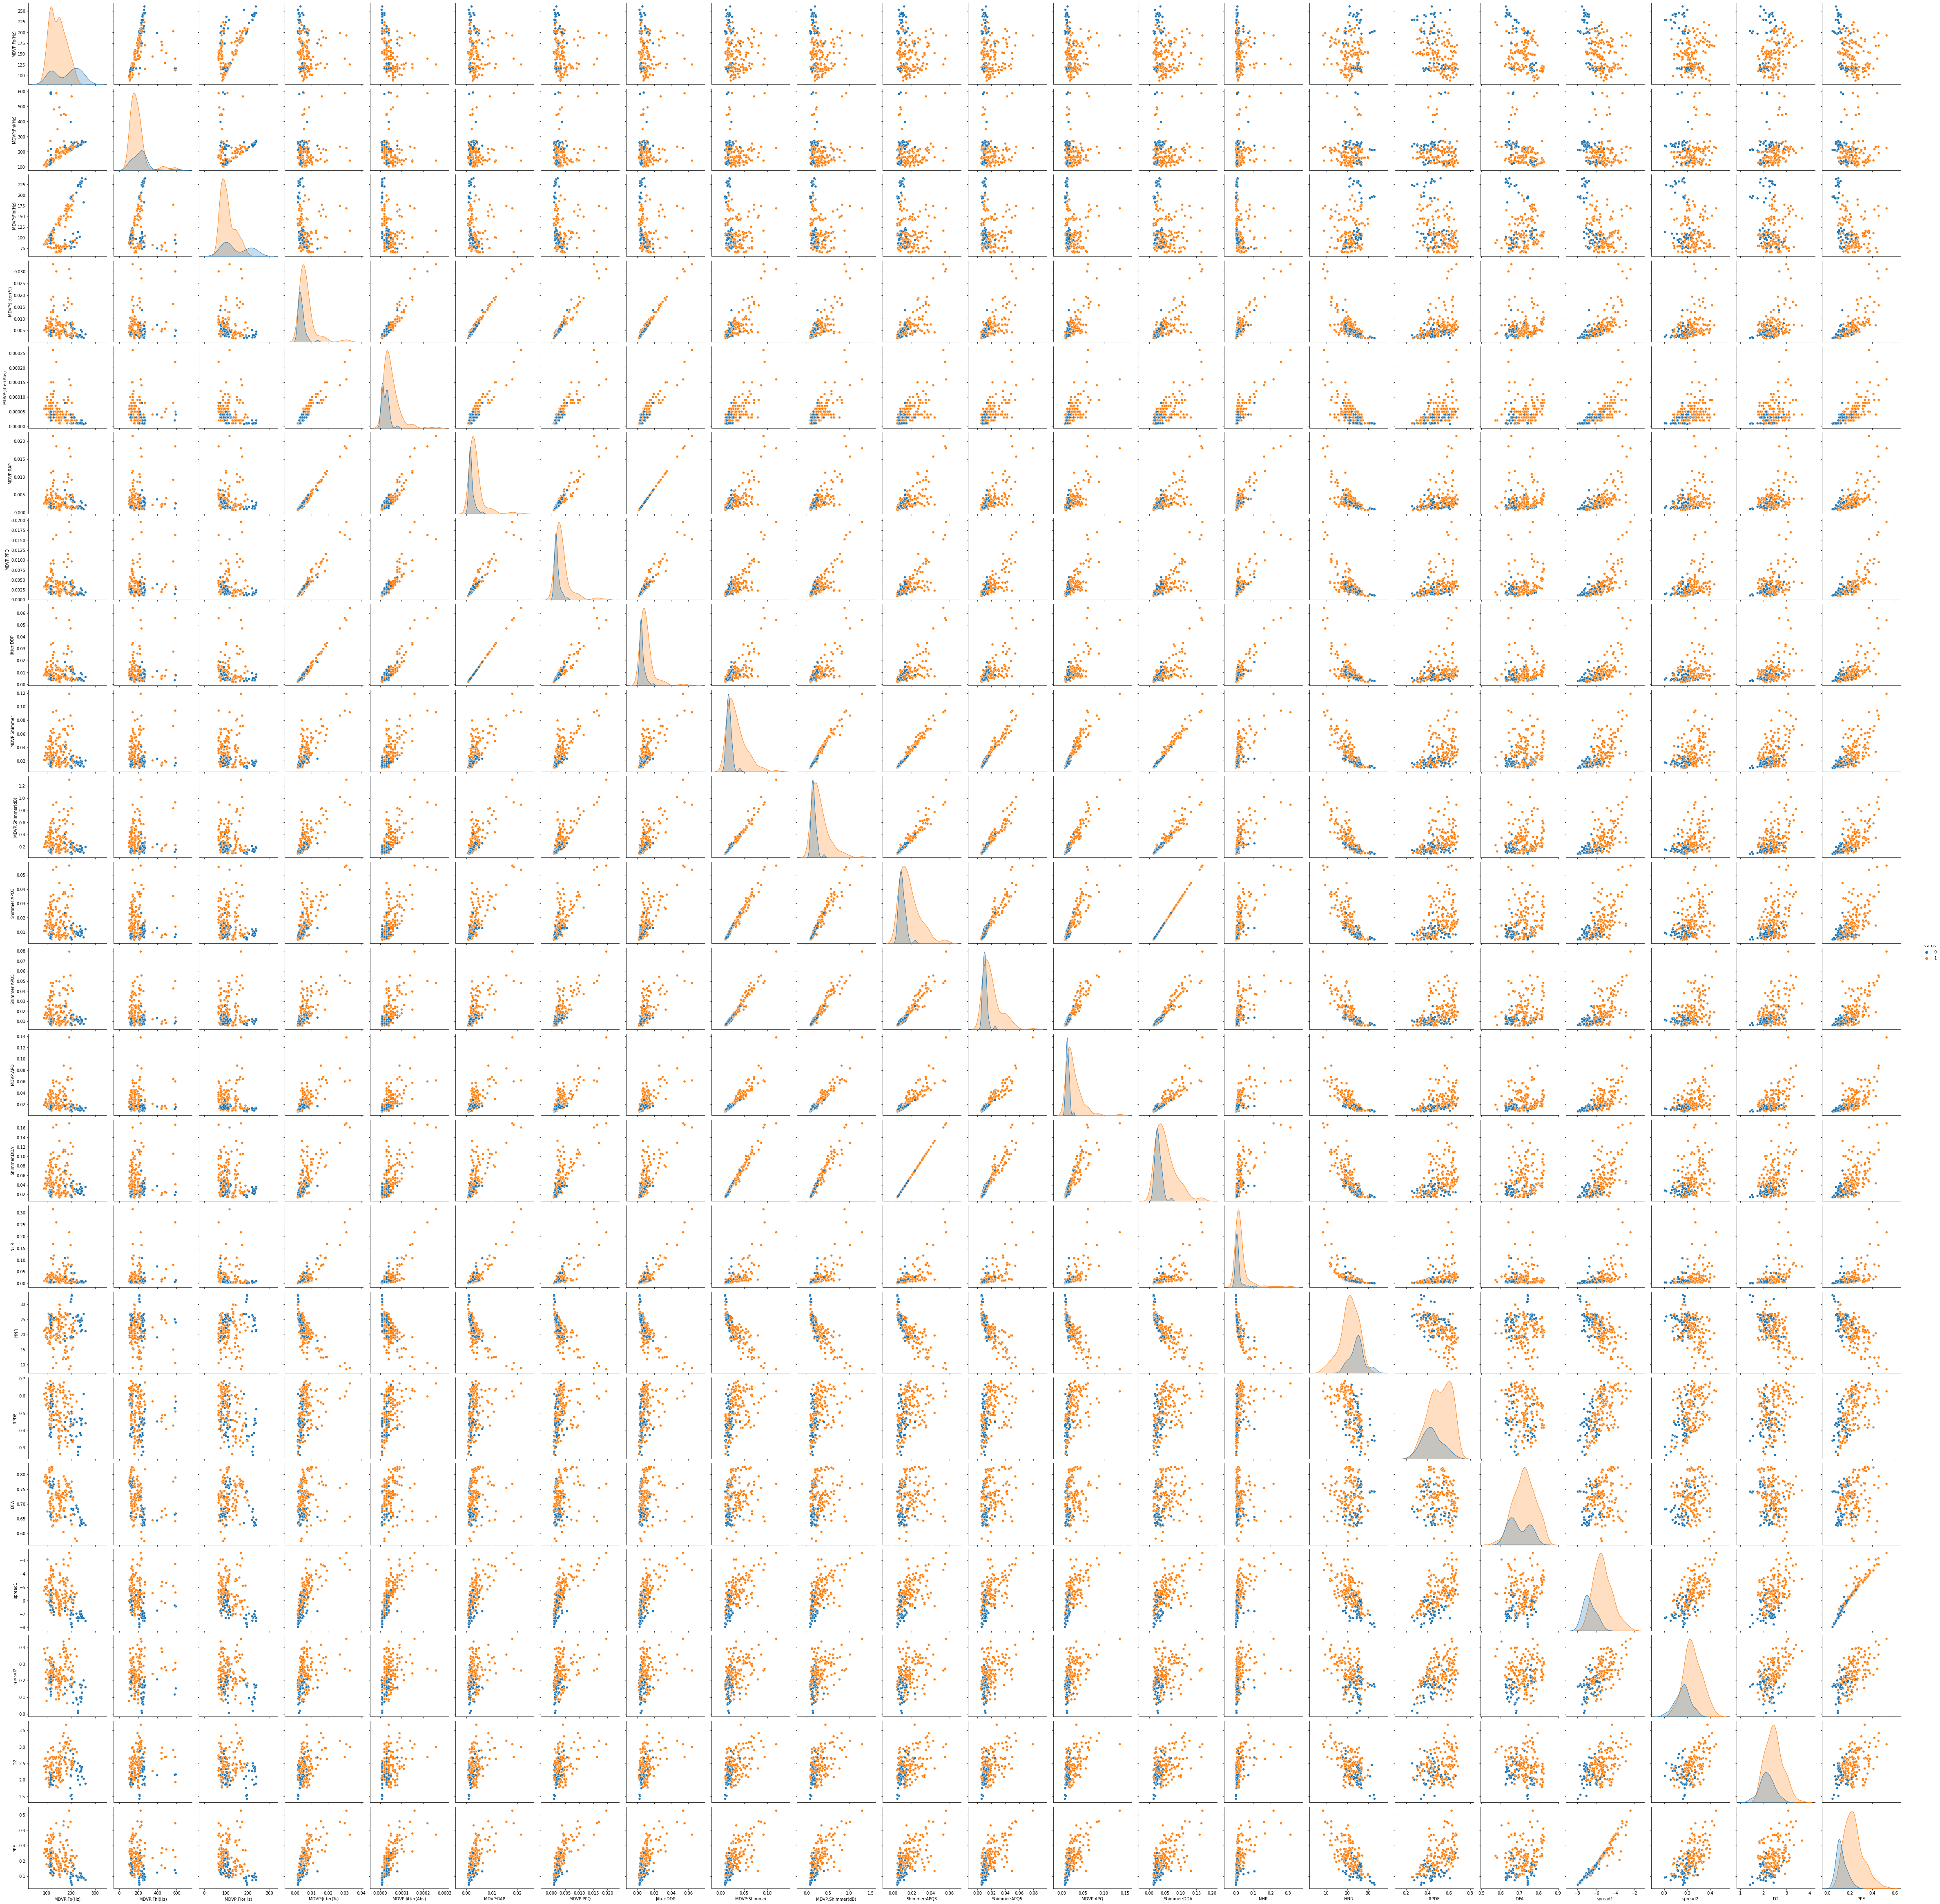

In [ ]:
import seaborn as sns
sns.pairplot(data,hue="status",height=3)

In [ ]:
data.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...          D2         PPE
count   195.000000    195.000000  ...  195.000000  195.000000
mean    154.228641    197.104918  ...    2.381826    0.206552
std      41.390065     91.491548  ...    0.382799    0.090119
min      88.333000    102.145000  ...    1.423287    0.044539
25%     117.572000    134.862500  ...    2.099125    0.137451
50%     148.790000    175.829000  ...    2.361532    0.194052
75%     182.769000    224.205500  ...    2.636456    0.252980
max     260.105000    592.030000  ...    3.671155    0.527367

[8 rows x 23 columns]

In [ ]:
data.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [ ]:
data.kurt()

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

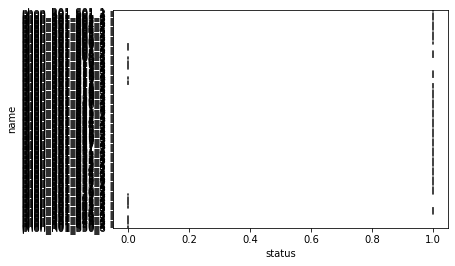

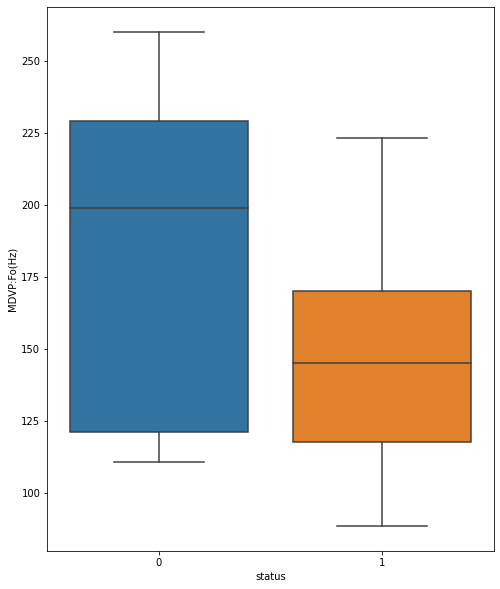

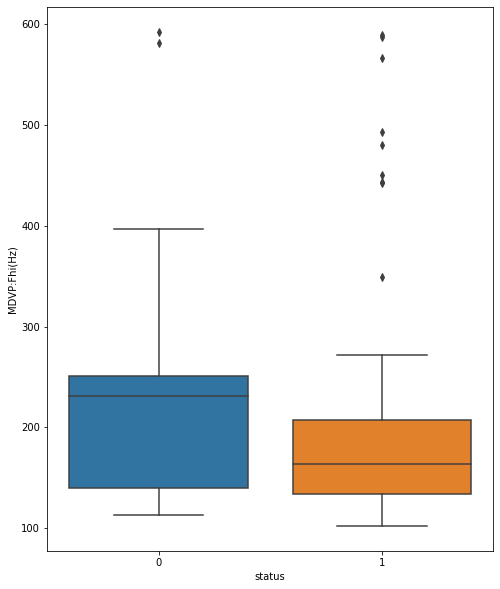

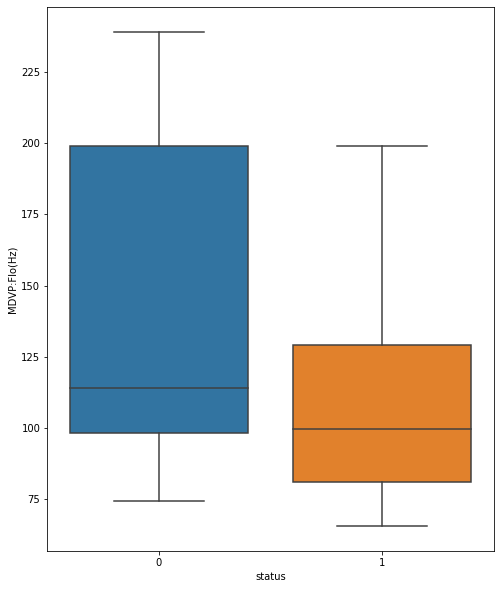

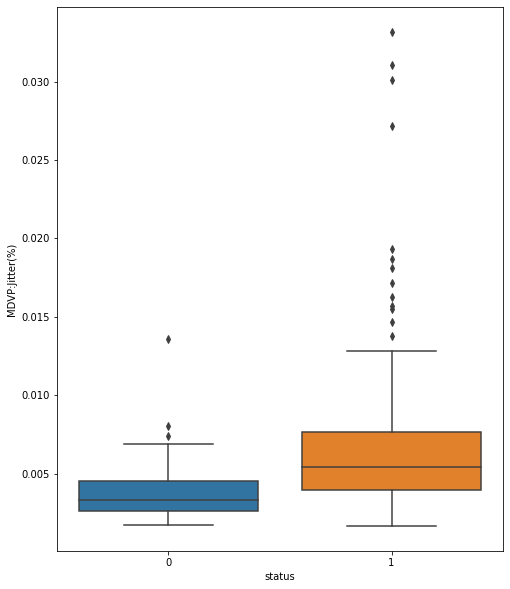

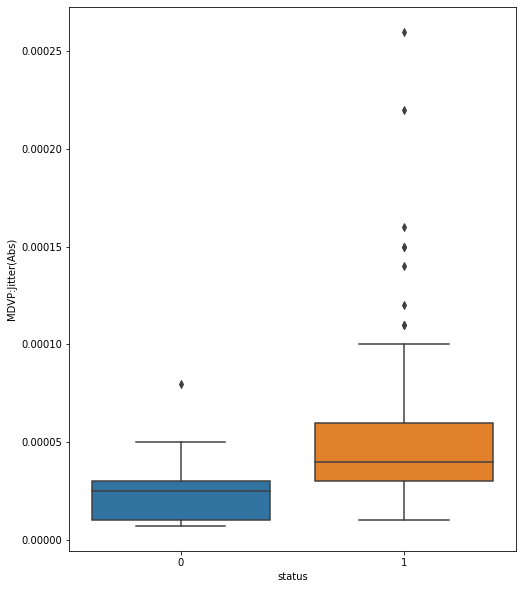

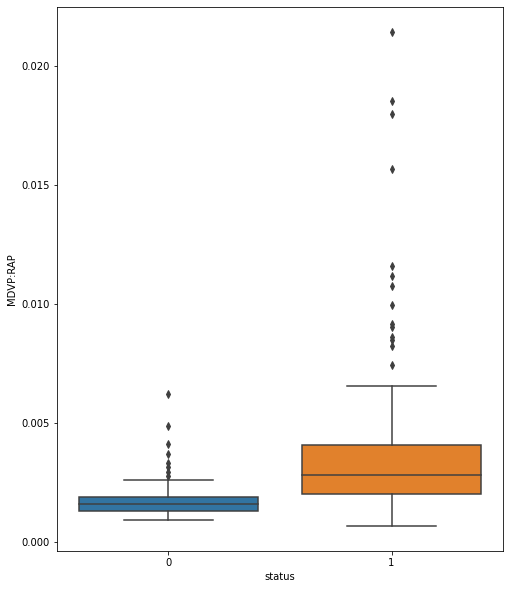

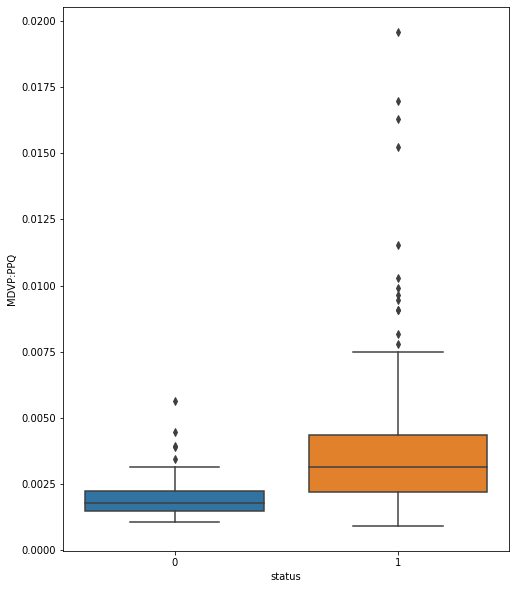

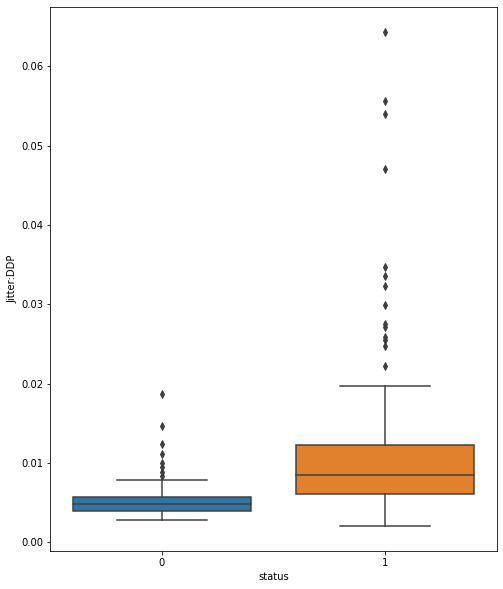

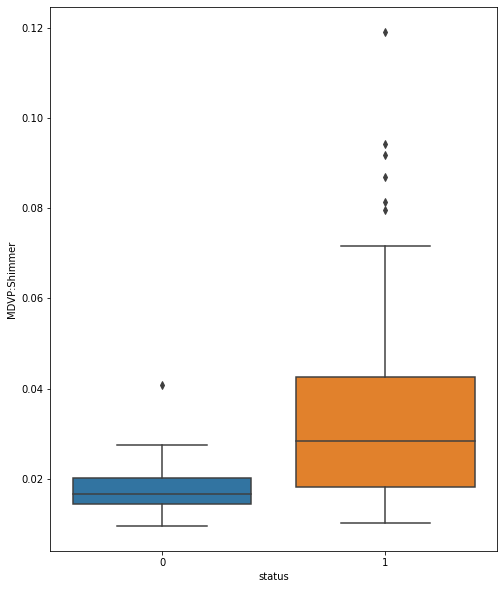

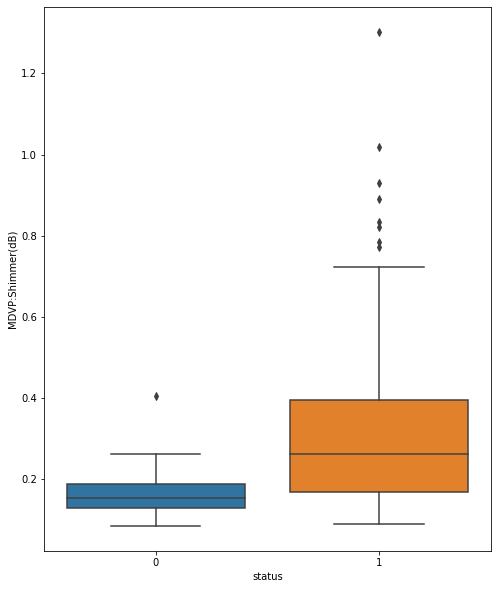

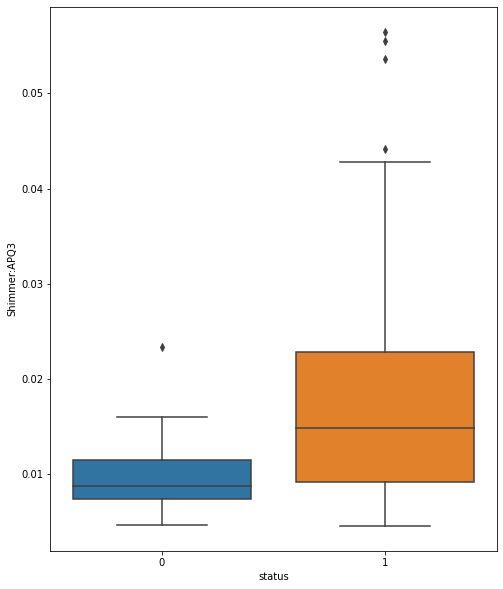

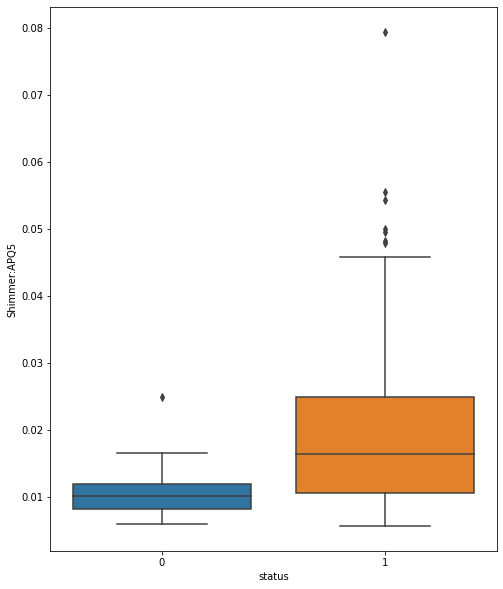

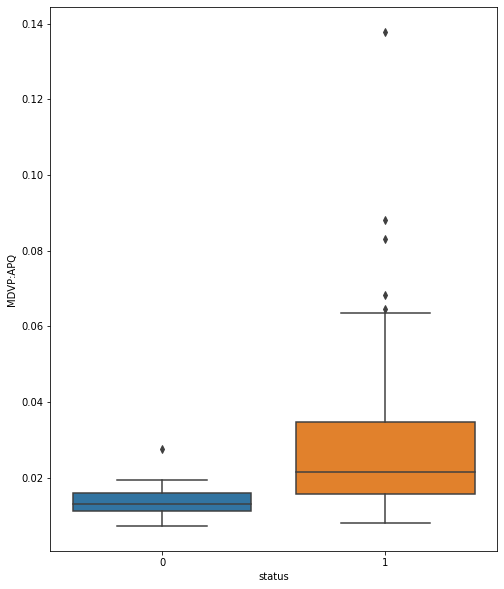

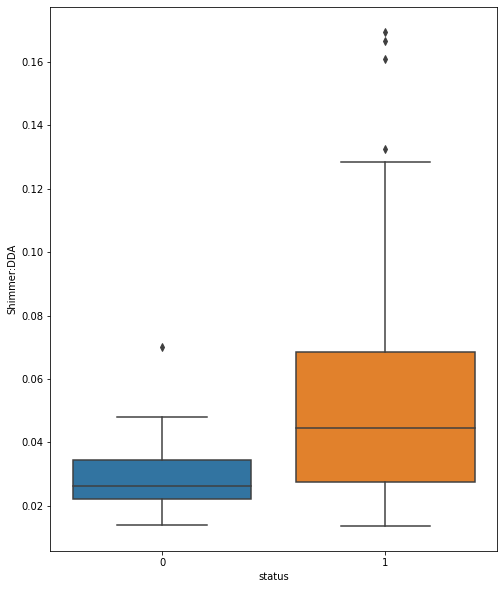

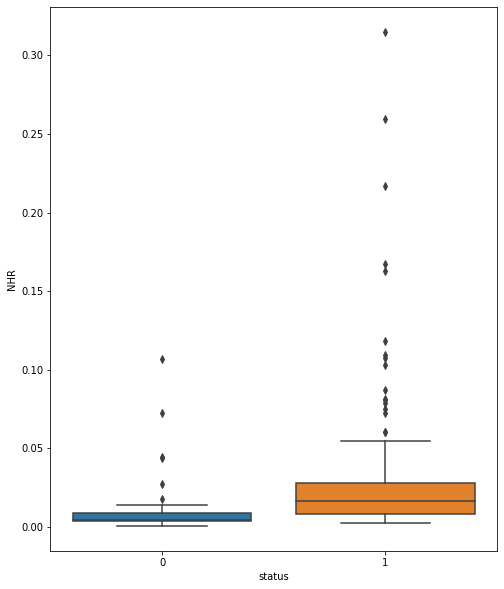

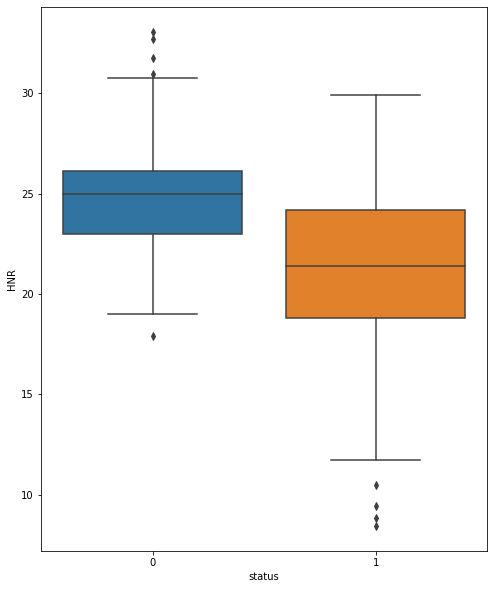

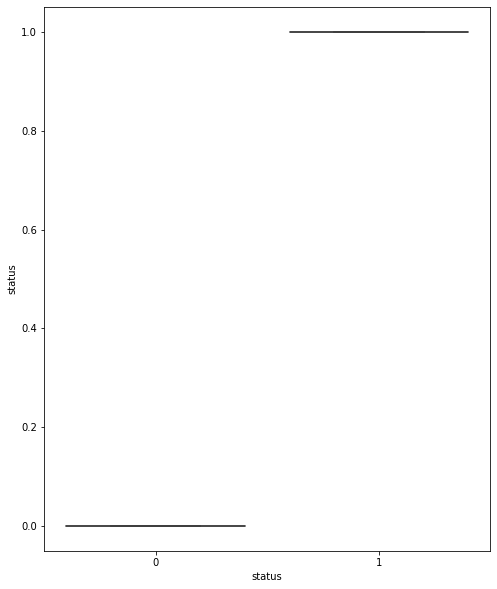

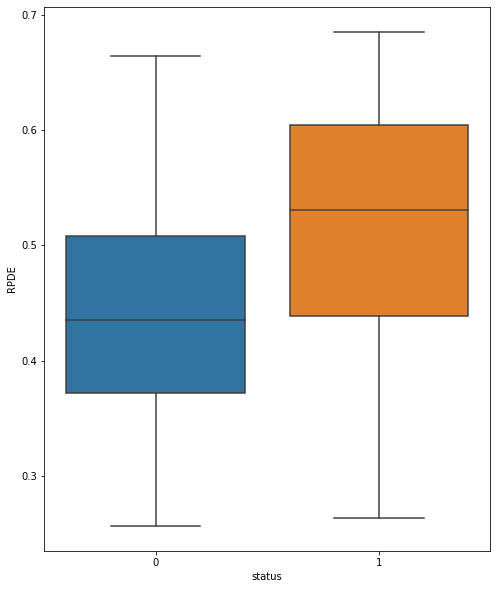

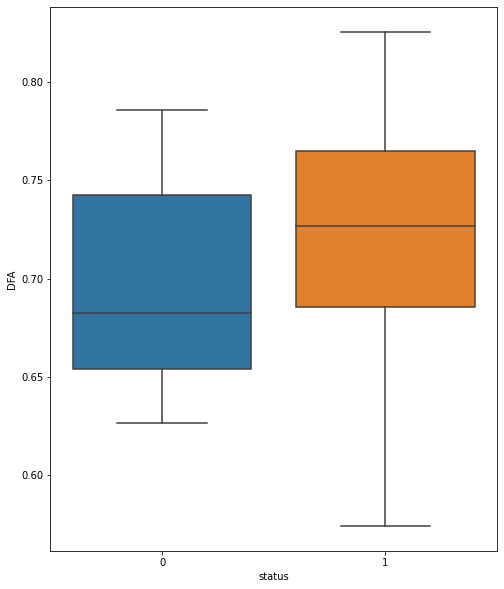

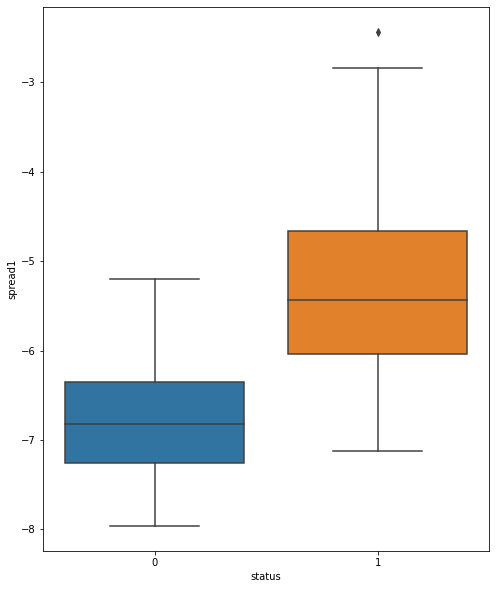

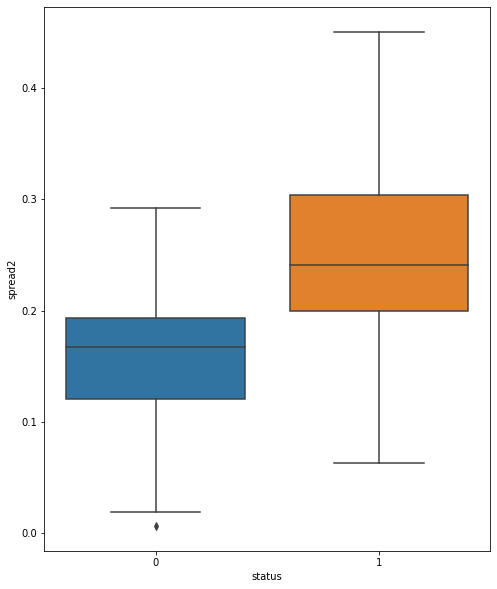

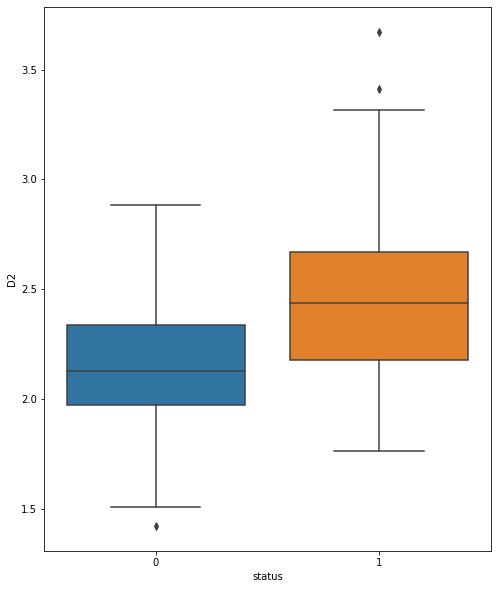

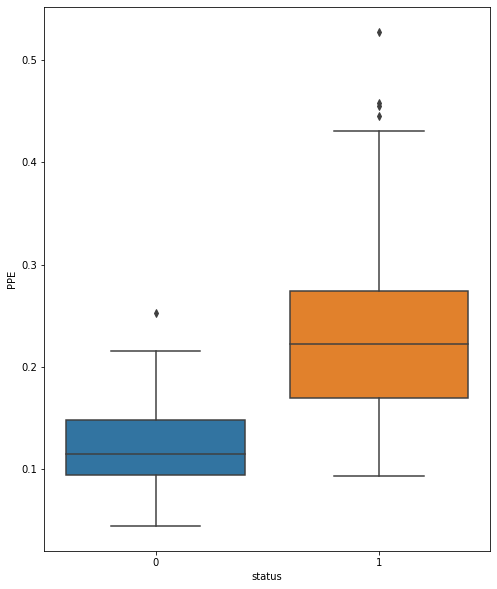

<Figure size 576x720 with 0 Axes>

In [ ]:

for i in data.columns:
  sns.boxplot(x="status", y=i, data=data)
  plt.figure(figsize = (8,10))

In [13]:
data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

# 4. Model Fitting

In [14]:
X=data.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,12,14,15,16,18,19,20,21,22,23]].values
y=data.iloc[:,17].values

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [16]:
sc_X = StandardScaler()

In [17]:
X_train = sc_X.fit_transform(X_train)

In [18]:
X_test = sc_X.transform(X_test)

In [19]:
pca = PCA(n_components = 2)

In [20]:
X_train = pca.fit_transform(X_train)

In [21]:
X_test = pca.transform(X_test)

In [22]:
variance = pca.explained_variance_ratio_

In [23]:
classifi = KNeighborsClassifier(n_neighbors = 8,p=2,metric ='minkowski')
classifi.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [24]:
y_pred = classifi.predict(X_test)

In [25]:
from sklearn.svm import SVC
classifi2 = SVC()
classifi2.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
y2_pred = classifi2.predict(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifi3 = RandomForestClassifier(n_estimators=16,criterion = "entropy",random_state=0)
classifi3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
y3_pred = classifi3.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc = {}

In [36]:
cm=confusion_matrix(y_test,y_pred)
acc['kNN'] = accuracy_score(y_test,y_pred)
print(acc['kNN'])

0.9743589743589743


In [37]:
cm2=confusion_matrix(y_test,y2_pred)
acc['SVC'] = accuracy_score(y_test,y2_pred)
print(acc['SVC'])

0.9230769230769231


In [38]:
cm3=confusion_matrix(y_test,y3_pred)
acc['Random Forest'] = accuracy_score(y_test,y3_pred)
print(acc['Random Forest'])

0.9743589743589743


In [39]:
key = list(acc.keys())
val = [float(acc[k]) for k in key]

In [40]:
col = sns.color_palette("Spectral",8)
col = col.as_hex()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


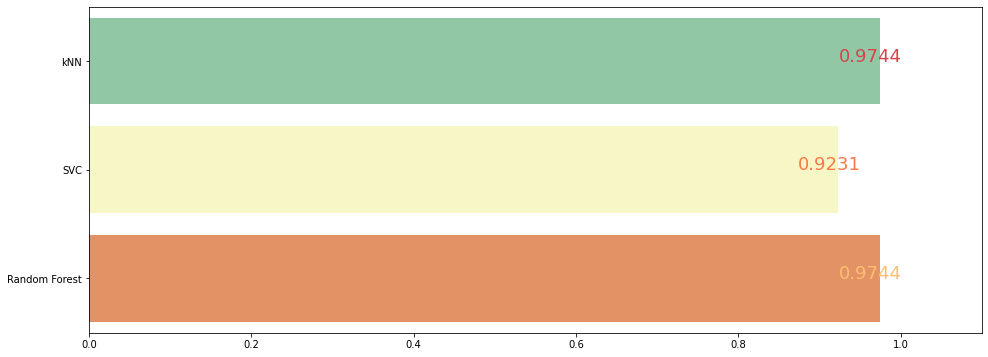

In [41]:
fig,acc = plt.subplots(figsize = (16,6))
acc = sns.barplot(val,key,palette="Spectral_r")
acc.set_xlim(0,1.1)
for i in range(0,len(key)):
 acc.text(val[i]-0.05,i,str(np.round(val[i],4)),fontdict = dict(color = col[i],fontsize = 18))

In [43]:
!banner "The End"

#######                         #######
   #     #    #  ######         #        #    #  #####
   #     #    #  #              #        ##   #  #    #
   #     ######  #####          #####    # #  #  #    #
   #     #    #  #              #        #  # #  #    #
   #     #    #  #              #        #   ##  #    #
   #     #    #  ######         #######  #    #  #####

